# PROJECT : Wrangling and Analyzing of WeRateDogs Twitter Data.

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from timeit import default_timer as timer
import os
import re
import matplotlib.pyplot as plt

## Gathering Data
There are three datasets to be gathered for this project.
1. The first one is an enhanced twitter archive csv file that is provided.
2. The second one is an image prediction file that will be requested with a provided url.
3. The last dataset is extracted from twitter using api and the tweepy library.

In [2]:
#1.Read the tweeter archive file using read_csv.
twitter_archive = pd.read_csv("D:/Data Analytics/Project_2/twitter-archive-enhanced.csv")

In [3]:
#2.Create a folder
image_pred_1 = 'D:\Data Analytics\Project_2\image_pred_1'
if not os.path.exists(image_pred_1):
    os.makedirs(image_pred_1)
    
#get the image prediction data using the Request library
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_pred = requests.get(url)

#Write the contents of the tsv file to the created file and folder.
with open(os.path.join(image_pred_1, 'image_pred'), 'wb') as file:
    file.write(image_pred.content)
    
#Read the file to display it.
img_pred = pd.read_csv('D:\Data Analytics\Project_2\image_pred_1\image_pred', sep = '\t')


In [4]:
#3. Apply for twitter developer account to get the access keys. 
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

#Get the IDs from the twitter archive file to help in query the twitter page.
tweet_ids = twitter_archive.tweet_id.values
tweet_ids

#Query the twitter page using the tweet_ids and use json to write the data to a file.   
fail ={}
start = timer()

with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print('Success')    
            json.dump(tweet._json, file)
            file.write('\n')   
        except tweepy.errors.TweepyException as e:
            print('Fail')
            fail[tweet_id] = e
            pass
end = timer()

print(end - start)

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Fail
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Succes

In [5]:
#Read the json file line by line extracting the id, favourite count and retweet count and save it to a dataframe.
columns =['id','favorite_count','retweet_count']
data = []

with open('tweet_json.txt', 'r') as new_file:
    json_obj = new_file.readline()
    while json_obj:
        data_item = json.loads(json_obj)
        row = dict((x, data_item[x]) for x in columns)
        data.append(row)
        json_obj = new_file.readline()
        
tweets = pd.DataFrame.from_dict(data)

## Assessment of Data

### 1. Visual Assessment

In [6]:
#Enhanced twitter archive
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
tweets

,id,favorite_count,retweet_count
0,892420643555336193,33663,6961
1,892177421306343426,29207,5266
2,891815181378084864,21956,3463
3,891689557279858688,36757,7187
4,891327558926688256,35149,7708
...,...,...,...
2293,666049248165822465,88,36
2294,666044226329800704,245,114
2295,666033412701032449,100,36
2296,666029285002620928,112,39


### 2. Programmatic assessment

In [9]:
#Enhanced twitter archive.
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
593,798925684722855936,NaN,NaN,2016-11-16 16:28:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadow. He's a firm believer that they...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798925684...,11,10,Shadow,None,None,None,None
1152,725786712245440512,NaN,NaN,2016-04-28 20:40:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lillie. She's a Rutabagan Floofem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725786712...,11,10,Lillie,None,None,pupper,None
1951,673686845050527744,NaN,NaN,2015-12-07 02:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He's upset that the 4th of Jul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673686845...,11,10,George,None,None,None,None
2060,671182547775299584,NaN,NaN,2015-11-30 04:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup holds the secrets of the universe in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671182547...,12,10,None,None,None,None,None
697,786595970293370880,NaN,NaN,2016-10-13 15:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dale. He's a real spookster. Did me qu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786595970...,11,10,Dale,None,None,None,None


In [11]:
twitter_archive.duplicated().sum()

0

In [12]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [13]:
twitter_archive['text'][313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [14]:
# Image prediction file
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
img_pred.duplicated().sum()

0

In [16]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
img_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [18]:
# API extracted tweets data.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2298 non-null   int64
 1   favorite_count  2298 non-null   int64
 2   retweet_count   2298 non-null   int64
dtypes: int64(3)
memory usage: 54.0 KB


In [19]:
tweets.sample(5)

,id,favorite_count,retweet_count
1953,672248013293752320,1525,520
1781,675898130735476737,1440,505
1530,686760001961103360,3232,1254
918,750056684286914561,2945,815
619,790337589677002753,7400,1761


In [20]:
tweets.isnull().sum()

id                0
favorite_count    0
retweet_count     0
dtype: int64

### Quality Issues
Tweeter archive dataset
1. Retweets in the dataset are not needed for the analysis.
2. Missing values in the expanded_urls,names,retweeted_status_id, retweeted_status_user_id,in_reply_to_status id, in_reply_to_user id columns and dog stages.
3. Timestamp column has been listed as an object and not a timestamp data type.
4. Somes names in the names column are not valid.
5. The rating of row 313 is 960/0 which is invalid and it is indicated in the text as 13/10.

Image prediction file

6. Names of the dogs are not in a standard format. Some begin with capital letters and some with small.
7. The use of '_' in the names columns is not necessary.


8. Across the datasets the tweet ids are integers datatype.


### Tidiness issues
1. Dog stages are separate.
2. The rating denominator and numerator are not of a standard format and hence a new column is needed for analysis that will standardize the values.


## Cleaning Data
Make copies of all the datasets

In [21]:
tadf = twitter_archive.copy()
ipdf = img_pred.copy()
twtdf = tweets.copy()

### Issue 1:

#### Define
Remove the retweets by filtering out the rows with retweets from the twitter archive dataset.

#### Code

In [22]:
tadf = tadf[tadf['retweeted_status_id'].isnull()]

#### Test

In [23]:
tadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue 2

#### Define
Remove the columns that are not revalent to the analysis. The in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

#### Code

In [24]:
tadf = tadf.drop(['expanded_urls','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id'], axis =1)      

#### Test

In [28]:
tadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 203.9+ KB


### Issue 3:

#### Define
Change the timestamp column datatype from int to timestamp.

#### Code

In [26]:
tadf.timestamp = pd.to_datetime(tadf.timestamp)

#### Test

In [27]:
tadf['timestamp'].dtypes

datetime64[ns, UTC]

### Issue 4:

#### Define
Identify all the names that are invalid and replace them with a standard name i.e None.

#### Code

In [29]:
list_names = tadf.name.apply(lambda x: re.findall(r'\b[a-z]\w+', x))

names =[]
for name in list_names :
    if name :
        if name not in names :
            names.append(name)
            
names

[['such'],
 ['quite'],
 ['not'],
 ['one'],
 ['incredibly'],
 ['very'],
 ['my'],
 ['his'],
 ['an'],
 ['actually'],
 ['just'],
 ['getting'],
 ['mad'],
 ['this'],
 ['unacceptable'],
 ['all'],
 ['old'],
 ['infuriating'],
 ['the'],
 ['by'],
 ['officially'],
 ['life'],
 ['light'],
 ['space']]

In [30]:
non_names = ['such','quite','not','one','incredibly','very','my','his','an','actually','just','getting','mad','this','unacceptable','all','old','infuriating','the','by','officially','life','light','space','a']

for i in non_names:
    tadf.loc[tadf.name == i, 'name'] = None
    

#### Test

In [31]:
tadf.name.value_counts()

None          680
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

### Issue 5:

#### Define
Change the rating of row 313 from 960/0 to 13/10.

#### Code

In [32]:
#changing the rating to 13/10.
# First convert to string dtype
tadf['rating_numerator'] = tadf['rating_numerator'].astype(str)
tadf['rating_numerator'][313] = tadf['rating_numerator'][313].replace('960','13')

tadf['rating_denominator'] = tadf['rating_denominator'].astype(str)
tadf['rating_denominator'][313] = tadf['rating_denominator'][313].replace('0','10')

C:\Users\Winnie\AppData\Local\Temp\ipykernel_1428\921371022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tadf['rating_numerator'][313] = tadf['rating_numerator'][313].replace('960','13')
C:\Users\Winnie\AppData\Local\Temp\ipykernel_1428\921371022.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tadf['rating_denominator'][313] = tadf['rating_denominator'][313].replace('0','10')


In [33]:
#Convert back to int
tadf['rating_numerator'] = tadf['rating_numerator'].astype(int)
tadf['rating_denominator'] = tadf['rating_denominator'].astype(int)

#### Test

In [34]:
tadf['rating_denominator'][313]

10

### Issue 6:

#### Define
Starndardize the names by capitalizing the first letter of all the names in the p1,p2,and p3.

#### Code

In [35]:
ipdf.p1 = ipdf.p1.str.capitalize()
ipdf.p2 = ipdf.p2.str.capitalize()
ipdf.p3 = ipdf.p3.str.capitalize()

#### Test

In [36]:
ipdf

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


### Isuue 7:

#### Define
Remove the '_'in the names in the p1,p2 and p3 columns.

#### Code

In [37]:
ipdf.p1 = ipdf.p1.str.replace("_", " ")
ipdf.p2 = ipdf.p2.str.replace("_", " ")
ipdf.p3 = ipdf.p3.str.replace("_", " ")

#### Test

In [38]:
ipdf.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1749,823699002998870016,https://pbs.twimg.com/media/C25d3nkXEAAFBUN.jpg,1,Cairn,0.203999,True,Snorkel,0.171893,False,Norfolk terrier,0.107543,True
1030,711306686208872448,https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg,1,Leatherback turtle,0.280835,False,Loggerhead,0.123290,False,Dandie dinmont,0.086792,True
706,684959798585110529,https://pbs.twimg.com/media/CYF3TSlWMAAaoG5.jpg,1,Llama,0.379624,False,Triceratops,0.162761,False,Hog,0.084251,False
1630,805487436403003392,https://pbs.twimg.com/media/Cy2qiTxXcAAtQBH.jpg,3,Shield,0.587830,False,Barrel,0.090180,False,Sundial,0.069199,False
1126,727524757080539137,https://pbs.twimg.com/media/Chiv6BAW4AAiQvH.jpg,2,Pomeranian,0.958834,True,Chihuahua,0.024099,True,Chow,0.003941,True


### Issue 8:

#### Define
Convert the datatype of tweet_ids from int to str.

#### Code

In [39]:
tadf.tweet_id = tadf.tweet_id.astype(str)

ipdf.tweet_id = ipdf.tweet_id.astype(str)

twtdf.id = twtdf.id.astype(str)


#### Test

In [40]:
tadf.tweet_id.dtype

dtype('O')

### Tidiness Issue 1:

#### Define
Merge the last 4 columns of the dataset(doggo, fluffer, pupper and poppo) into one column 'stage', for the dog stages

#### Code

In [41]:
tadf.doggo.replace(('None', ''), inplace=True)
tadf.floofer.replace(('None', ''), inplace=True)
tadf.pupper.replace(('None', ''), inplace=True)
tadf.puppo.replace(('None', ''), inplace=True)

# merge into column
tadf['stage'] = tadf.doggo + tadf.floofer + tadf.pupper + tadf.puppo

# handle multiple stages
tadf.loc[tadf.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
tadf.loc[tadf.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
tadf.loc[tadf.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

# handle missing values
tadf.loc[tadf.stage == '', 'stage'] = np.nan

In [42]:
#Remove the original columns since it's no longer needed using the drop () method
tadf.drop('doggo', inplace=True, axis=1)
tadf.drop('floofer', inplace=True, axis=1)
tadf.drop('pupper', inplace=True, axis=1)
tadf.drop('puppo', inplace=True, axis=1)

#### Test

In [43]:
tadf.stage.value_counts()

doggoflooferpupperpuppo    2132
doggoNoneNonepuppo           16
doggoNonepupperpuppo         15
NoneNoneNoneNone              9
doggoNoneNoneNone             3
Name: stage, dtype: int64

In [44]:
tadf.stage

0              NoneNoneNoneNone
1              NoneNoneNoneNone
2              NoneNoneNoneNone
3              NoneNoneNoneNone
4              NoneNoneNoneNone
                 ...           
2351    doggoflooferpupperpuppo
2352    doggoflooferpupperpuppo
2353    doggoflooferpupperpuppo
2354    doggoflooferpupperpuppo
2355    doggoflooferpupperpuppo
Name: stage, Length: 2175, dtype: object

### Tidiness Issue 2:

#### Define
Find the average ratings by dividing rating_numerator by rating_denominator and add a new column 'ratings' to the dataset

#### Code

In [45]:
#Divide the numerator by denominator
tadf['ratings'] = tadf['rating_numerator'] / tadf['rating_denominator']

#### Test

In [46]:
tadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int32              
 5   rating_denominator  2175 non-null   int32              
 6   name                2071 non-null   object             
 7   stage               2175 non-null   object             
 8   ratings             2175 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int32(2), object(5)
memory usage: 217.5+ KB


### Define
Merge the datasets to make one large dataset.

#### Code

In [47]:
#Change column name of tweets id from id to tweet_id
twtdf.rename(columns ={'id': 'tweet_id'}, inplace = True)

#Merge
master_df = pd.merge(tadf, ipdf, how='inner', on=['tweet_id'])

# now merge df and tweet_json_copy
master_df = pd.merge(master_df, twtdf, how='inner', on=['tweet_id'])

#### Test

In [48]:
master_df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,ratings,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NoneNoneNoneNone,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,33663,6961
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NoneNoneNoneNone,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,29207,5266
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NoneNoneNoneNone,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,21956,3463
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NoneNoneNoneNone,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,36757,7187
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NoneNoneNoneNone,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,35149,7708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,doggoflooferpupperpuppo,0.5,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,88,36
1958,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,None,doggoflooferpupperpuppo,0.6,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True,245,114
1959,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,None,doggoflooferpupperpuppo,0.9,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,100,36
1960,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,None,doggoflooferpupperpuppo,0.7,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,112,39


### Issue 11:

#### Define
The source column has redundant data that is not useful for this analysis.Drop the extra tags.

#### Code

In [49]:
# removing 'href=' tags and extracting the source text
master_df.source = master_df.source.apply(lambda x: re.findall(r'>(.*)<',x)[0])

#### Test

In [50]:
master_df.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,ratings,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
546,773704687002451968,2016-09-08 02:09:06+00:00,Twitter for iPhone,This is Loki. He knows he's adorable. One ear ...,12,10,Loki,doggoflooferpupperpuppo,1.2,https://pbs.twimg.com/media/CrzATQqWAAEHq2t.jpg,...,0.324251,True,Yorkshire terrier,0.181210,True,Airedale,0.133436,True,6208,1489
275,824325613288833024,2017-01-25 18:38:36+00:00,Twitter for iPhone,Retweet the h*ck out of this 13/10 pupper #Bel...,13,10,None,doggoflooferpupperpuppo,1.3,https://pbs.twimg.com/media/C3CXxaoWQAAiLuC.jpg,...,0.990793,True,Cardigan,0.008919,True,Basenji,0.000262,True,11128,9844
1118,695409464418041856,2016-02-05 00:51:51+00:00,Twitter for iPhone,This is Bob. He just got back from his job int...,10,10,Bob,doggoflooferpupperpuppo,1.0,https://pbs.twimg.com/media/CaaXN5LUYAEzAh-.jpg,...,0.997445,True,Bull mastiff,0.001749,True,Pekinese,0.000304,True,7962,3231
856,724004602748780546,2016-04-23 22:38:43+00:00,Twitter for iPhone,This is Luther. He saw a ghost. Spooked af. 11...,11,10,Luther,doggoflooferpupperpuppo,1.1,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,...,0.950526,False,Pug,0.018877,True,Quilt,0.007628,False,3826,1387
1233,686730991906516992,2016-01-12 02:06:41+00:00,Twitter for iPhone,I just love this picture. 12/10 lovely af http...,12,10,None,doggoflooferpupperpuppo,1.2,https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg,...,0.338812,True,Newfoundland,0.180925,True,Golden retriever,0.180023,True,3789,1087


In [51]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1962 non-null   object             
 1   timestamp           1962 non-null   datetime64[ns, UTC]
 2   source              1962 non-null   object             
 3   text                1962 non-null   object             
 4   rating_numerator    1962 non-null   int32              
 5   rating_denominator  1962 non-null   int32              
 6   name                1865 non-null   object             
 7   stage               1962 non-null   object             
 8   ratings             1962 non-null   float64            
 9   jpg_url             1962 non-null   object             
 10  img_num             1962 non-null   int64              
 11  p1                  1962 non-null   object             
 12  p1_conf             1962 non-null 

## Storing Data

In [52]:
master_df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data 

### Insights
1. Which dog name is most preferred?
2. What is the correlation between retweet_count and favorite_count of the dogs?
3. What is the correlation between favorite_count and ratings ?
4. What source was used the most to obtain the data?

In [53]:
#Most preferred name.
master_df.name.value_counts()

None          540
Cooper         10
Charlie        10
Oliver         10
Lucy            9
             ... 
Rose            1
Theo            1
Rocco           1
Fido            1
Christoper      1
Name: name, Length: 905, dtype: int64

Cooper, Charlie and Oliver was the most preferred dog name followed closely by Lucy.

In [54]:
# Correlation between retweet_count and favorite_count
fav_cor = master_df[['retweet_count','favorite_count']].corr()
fav_cor

,retweet_count,favorite_count
retweet_count,1.000000,0.932673
favorite_count,0.932673,1.000000


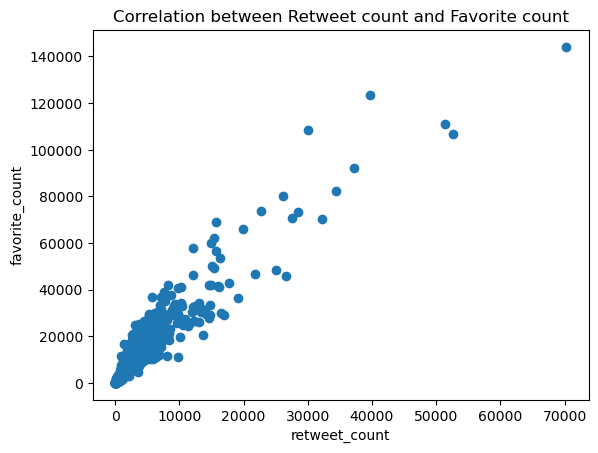

In [55]:
# a scatterplot of the correlation between retweet_count and favorite_count
plt.scatter(x = master_df.retweet_count,y = master_df.favorite_count)
plt.title('Correlation between Retweet count and Favorite count')
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.show()

The correlation coefficient beteen retweet_count and favorite_count is 0.932673, which is close to 1 and positive demonstrating a strong positive correlation bewteen the two metrics. Hence, the retweet_count and favorite_count are highly positively correlated.

In [56]:
# The correlation between favorite count and ratings.
rat_cor = master_df[['ratings','favorite_count']].corr()
rat_cor

,ratings,favorite_count
ratings,1.000000,0.021859
favorite_count,0.021859,1.000000


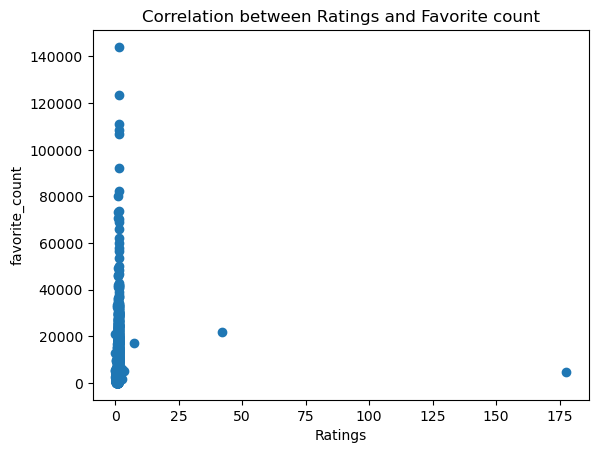

In [57]:
# a scatterplot of the correlation between retweet_count and favorite_count
plt.scatter(x = master_df.ratings,y = master_df.favorite_count)
plt.title('Correlation between Ratings and Favorite count')
plt.xlabel('Ratings')
plt.ylabel('favorite_count')
plt.show()

The correlation coefficient beteen Ratings and favorite_count is 0.021859, which is close to 0.This demonstrates a negative correlation between the two metrics. Hence, the ratings and favorite_count are negatively correlated meaning the occurrence of one does not affect the other.

In [58]:
master_df.source.value_counts()

Twitter for iPhone    1924
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

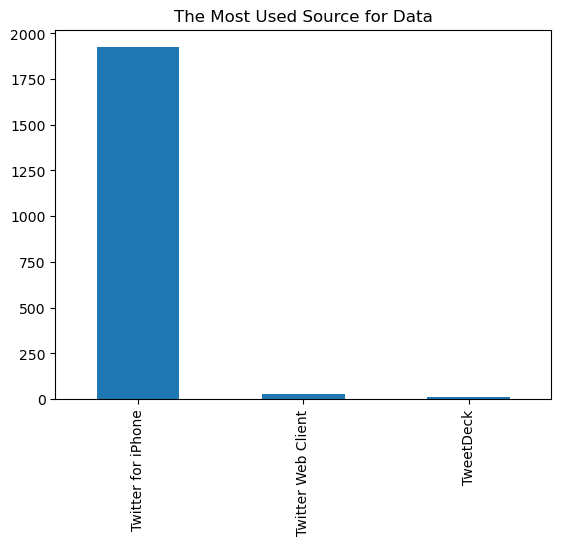

In [59]:
master_df.source.value_counts().plot.bar(title = 'The Most Used Source for Data');

Twitter for iphone was the most used source for the data with a frequency of 1924 as compared to Twitter web client and TweetDeck which had the lowest traffic.

## References.
1. Pandas 1.4.4 documentation.
2. Udacity resources.
3. https://www.geeksforgeeks.org/
4. https://stackoverflow.com/
5. https://www.datasciencemadesimple.com/